In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("CC GENERAL.csv")
# Removing full row if any attribute is missing.
df.dropna(inplace = True)
df.shape

(8636, 18)

In [4]:
df = df.iloc[:, 1:]

In [8]:
import pandas as pd

df.fillna(df.mean(), inplace=True)

# Check for missing values
missing_values = df.isnull().sum()

# Print missing values count for each column
print("Missing Values Count:")
print(missing_values)

# Check if there are any missing values left
if missing_values.sum() == 0:
    print("No missing values remain.")
else:
    print("There are still missing values in the DataFrame.")


Missing Values Count:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
No missing values remain.


# K - Means

In [5]:
from sklearn.cluster import KMeans

# Instantiate KMeans with k=5 and explicitly set n_init
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any desired value

# Fit KMeans to the data
kmeans.fit(df)

# Fit KMeans to the data
kmeans.fit(df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the count of data points in each cluster
print("Count of data points in each cluster:")
print(df['Cluster'].value_counts())


Count of data points in each cluster:
Cluster
0    5198
2    2416
4     873
1     111
3      38
Name: count, dtype: int64


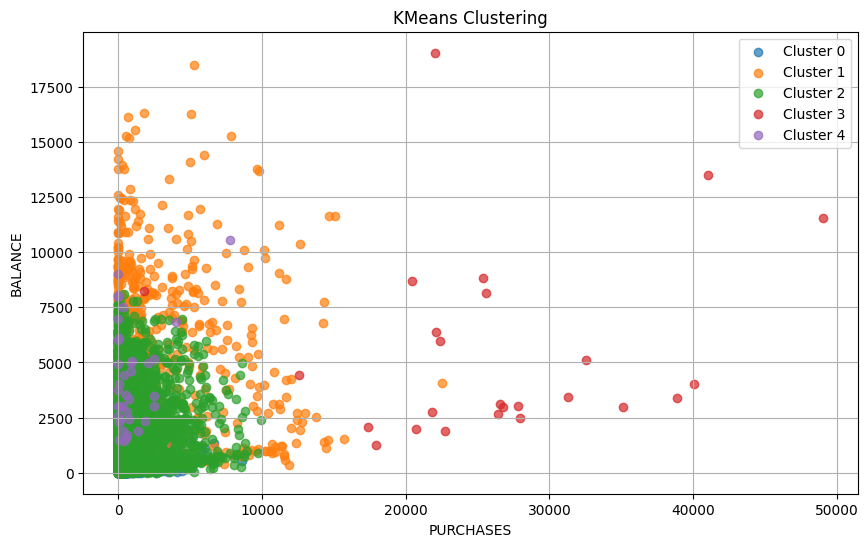

In [10]:
import matplotlib.pyplot as plt

# Choose features for plotting
feature1 = 'PURCHASES'
feature2 = 'BALANCE'

# Plot each cluster with a different color
plt.figure(figsize=(10, 6))

for cluster in range(5):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}', alpha=0.7)

# Add labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()


# K - Mediods

In [6]:
!pip install scikit-learn-extra


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/343.0 kB ? eta -:--:--
   --- ------------------------------------ 30.7/343.0 kB ? eta -:--:--
   --- ------------------------------------ 30.7/343.0 kB ? eta -:--:--
   ----------- -------------------------- 102.4/343.0 kB 991.0 kB/s eta 0:00:01
   ----------- -------------------------- 102.4/343.0 kB 991.0 kB/s eta 0:00:01
   -------------------- ----------------- 184.3/343.0 kB 930.9 kB/s eta 0:00:01
   -------------------- ----------------- 184.3/343.0 kB 930.9 kB/s eta 0:00:01
   -------------------- ----------------- 184.3/343.0 kB 930.9 kB/s eta 0:00:01
   -------------------- ----------------- 184.3/343.0 kB 930.9 kB/s eta 0:00:01
   -------------------- ----------------- 184.3/343.0 kB 930.9 kB/s eta 0:00:01
   ----------------------------------- -- 317.4/343.0 kB 787.7 kB/s eta 0:00:01
   ----------------------------------- -- 317.4/343.0 kB 787.7 kB/s


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn_extra.cluster import KMedoids

# Assuming 'df' is your DataFrame with the relevant columns
# Assuming you have already handled missing values and scaled the data if necessary

# Choose the number of clusters
n_clusters = 5

# Instantiate KMedoids with the number of clusters
kmedoids = KMedoids(n_clusters=n_clusters)

# Fit KMedoids to the data
kmedoids.fit(df)

# Get the cluster labels
cluster_labels = kmedoids.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the count of data points in each cluster
print("Count of data points in each cluster:")
print(df['Cluster'].value_counts())


Count of data points in each cluster:
Cluster
1    2455
4    1779
2    1496
3    1490
0    1416
Name: count, dtype: int64


In [14]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=86)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=42)
cluster_labels = kmedoids.fit_predict(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # or 'macro', 'micro', 'weighted'

print(f'F1 Score: {f1}')


F1 Score: 0.8432432432432434


# Hierarichal Clustering

Count of data points in each cluster:
Cluster
4    4504
3    2336
0    1680
1      93
2      23
Name: count, dtype: int64


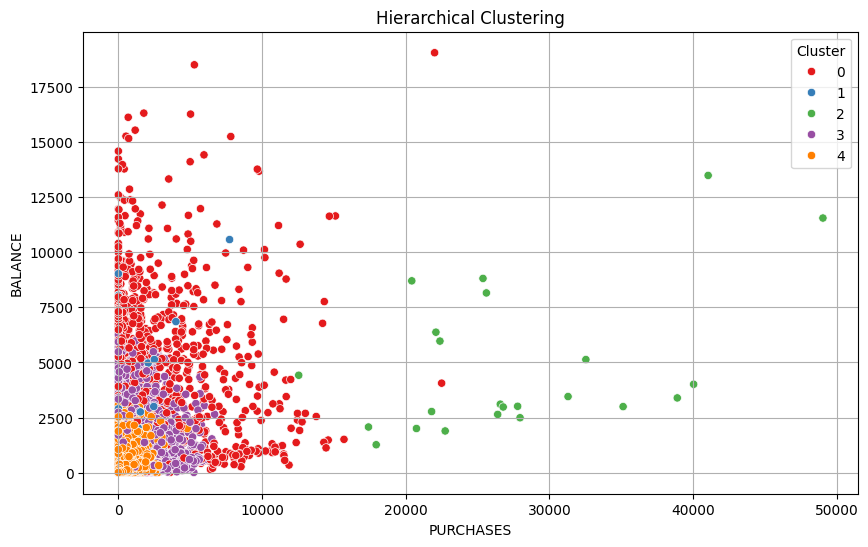

In [8]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the number of clusters
n_clusters = 5

# Instantiate AgglomerativeClustering with the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit AgglomerativeClustering to the data
agg_clustering.fit(df)

# Get the cluster labels
cluster_labels = agg_clustering.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the count of data points in each cluster
print("Count of data points in each cluster:")
print(df['Cluster'].value_counts())

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PURCHASES', y='BALANCE', hue='Cluster', palette='Set1')
plt.title('Hierarchical Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, random_state=64)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=2)
cluster_labels = clustering.fit_predict(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier using the clusters as features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # or 'macro', 'micro', 'weighted'

print(f'F1 Score: {f1}')


F1 Score: 0.904
